In [2]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [9]:
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

In [11]:
print('Training Dataset: ',train_images.shape,test_labels.shape)
print('Testing Dataset: ',test_images.shape,test_labels.shape)
print(train_labels[0:20])

Training Dataset:  (60000, 28, 28) (10000,)
Testing Dataset:  (10000, 28, 28) (10000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [24]:
total_classes = np.unique(train_labels)
number_of_total_classes = len(total_classes)
print("Total Number of Output Classes : ",number_of_total_classes)
print('All Output Classes : ',total_classes)

Total Number of Output Classes :  10
All Output Classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label: 9')

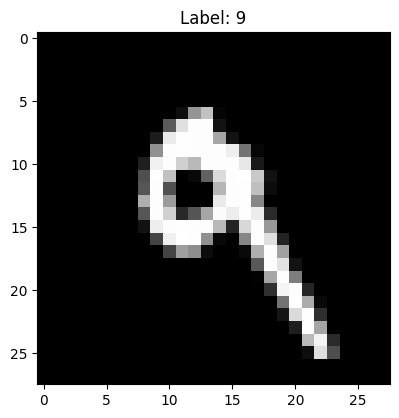

In [28]:
plt.figure(figsize = [10,10])
plt.subplot(122)
plt.imshow(test_images[7,:,:],cmap = 'gray')
plt.title('Label: {}'.format(test_labels[7]))

In [16]:
newdimensionData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],newdimensionData)
test_data = test_images.reshape(test_images.shape[0],newdimensionData)
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [19]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [20]:

train_data /= 255
test_data /= 255

In [21]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [29]:
print('Orignal label 6 : ',train_labels)
print('After Conversion To Categorical (One-hot) : ',train_labels_one_hot[10])

Orignal label 6 :  [5 0 4 ... 5 6 8]
After Conversion To Categorical (One-hot) :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [30]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(newdimensionData,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(number_of_total_classes,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics= ['accuracy'])

In [36]:
histroy = model.fit(train_data,train_labels_one_hot,batch_size= 256,epochs=10,verbose =1,validation_data=(test_data, test_labels_one_hot))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.4787 - loss: 1.9275 - val_accuracy: 0.8256 - val_loss: 0.8977
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8377 - loss: 0.7843 - val_accuracy: 0.8739 - val_loss: 0.5297
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8743 - loss: 0.5135 - val_accuracy: 0.8906 - val_loss: 0.4233
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8886 - loss: 0.4232 - val_accuracy: 0.9016 - val_loss: 0.3713
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8967 - loss: 0.3830 - val_accuracy: 0.9081 - val_loss: 0.3402
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9053 - loss: 0.3460 - val_accuracy: 0.9133 - val_loss: 0.3205
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9096 - loss: 0.3283 - val_accuracy: 0.9171 - val_loss: 0.3043
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9124 - loss: 0.3120 - val_accu

In [37]:
[test_loss,test_acc] = model.evaluate(test_data,test_labels_one_hot)
print("Evaluation Results : Loss = {}, accuracy = {} ".format(test_loss,test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9120 - loss: 0.3170
Evaluation Results : Loss = 0.27224913239479065, accuracy = 0.9253000020980835 


In [38]:
y_pred = model.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [39]:
y_pred_labels = np.argmax(y_pred,axis=1)

In [41]:
y_pred_labels

array([7, 2, 1, ..., 4, 5, 6])

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_labels,test_labels)

array([[ 957,    0,   10,    3,    1,    9,   11,    3,    9,   14],
       [   0, 1110,    3,    0,    2,    3,    3,   10,    6,    6],
       [   1,    2,  929,   18,    3,    6,    5,   27,   11,    3],
       [   2,    2,   14,  936,    1,   44,    1,    6,   30,   12],
       [   0,    1,   14,    0,  918,    7,   12,   10,   10,   37],
       [   5,    2,    1,   17,    0,  773,    9,    0,   20,    6],
       [  11,    4,   14,    2,   14,   15,  915,    0,   12,    0],
       [   1,    1,   15,   11,    2,    5,    1,  941,    8,   10],
       [   3,   13,   27,   14,    4,   23,    1,    2,  857,    4],
       [   0,    0,    5,    9,   37,    7,    0,   29,   11,  917]])

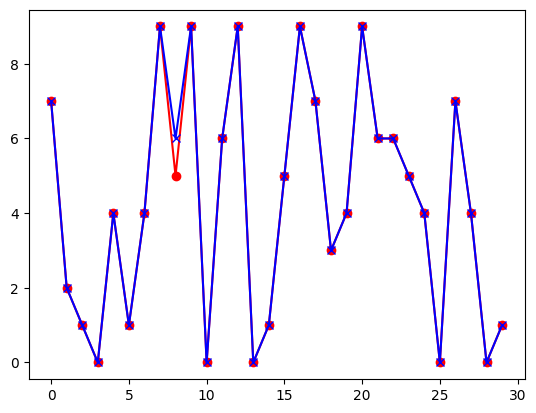

In [46]:
plt.plot(range(len(test_labels))[:30],test_labels[:30], color='r', label='Ground Truth', linestyle='-',marker='o');
plt.plot(range(len(test_labels))[:30], y_pred_labels[:30], color='b', label='Predicated', linestyle='-',marker='x');